In [2]:
from pycaret.anomaly import *

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
import matplotlib.pyplot as plt

In [5]:
from sklearn.preprocessing import StandardScaler

In [8]:
df = pd.read_csv('C:/Users/cjoly/projet/Net1_CMH/Scenario-506/df_min.csv')
y = pd.read_csv('C:/Users/cjoly/projet/Net1_CMH/Scenario-506/Labels.csv')

In [9]:
df

Unnamed: 0  Node 11  Link 21  Link 22  Pressure 10
0               0     18.0     39.6     18.0       90.960
1               1     18.0     43.2     14.4       91.552
2               2     14.4     43.2     14.4       92.190
3               3     14.4     46.8     14.4       92.841
4               4     14.4     46.8     14.4       93.473
...           ...      ...      ...      ...          ...
17515       17515     32.4     -3.6      7.2      115.912
17516       17516     25.2     -0.0      7.2      117.959
17517       17517     25.2     -3.6      7.2      119.255
17518       17518     25.2     -0.0      7.2      120.973
17519       17519     21.6     -3.6      7.2      122.545

[17520 rows x 5 columns]

In [10]:
df =df.drop(df.columns[0], axis=1)

In [12]:
X_train, X_test=train_test_split(df, test_size=0.2,random_state=3)

In [13]:
s=setup(X_train,normalize = True)

IntProgress(value=0, description='Processing: ', max=3)

Initiated  . . . . . . . . . . . . . . . . . .            09:52:31
Status     . . . . . . . . . . . . . . . . . .  Preprocessing Data

Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

Data Type
Node 11       Numeric
Link 21       Numeric
Link 22       Numeric
Pressure 10   Numeric

ImportError: Numba requires at least version 0.37.0 of llvmlite.
Installed version is 0.36.0.
Please update llvmlite.

In [173]:
models()

Name                    Reference
ID                                                                       
abod            Angle-base Outlier Detection        pyod.models.abod.ABOD
cluster       Clustering-Based Local Outlier      pyod.models.cblof.CBLOF
cof         Connectivity-Based Local Outlier          pyod.models.cof.COF
iforest                     Isolation Forest  pyod.models.iforest.IForest
histogram  Histogram-based Outlier Detection        pyod.models.hbos.HBOS
knn             K-Nearest Neighbors Detector          pyod.models.knn.KNN
lof                     Local Outlier Factor          pyod.models.lof.LOF
svm                   One-class SVM detector      pyod.models.ocsvm.OCSVM
pca             Principal Component Analysis          pyod.models.pca.PCA
mcd           Minimum Covariance Determinant          pyod.models.mcd.MCD
sod               Subspace Outlier Detection          pyod.models.sod.SOD
sos             Stochastic Outlier Selection          pyod.models.sos.SOS

In [15]:
svm = create_model('svm')
print(svm)

OCSVM(cache_size=200, coef0=0.0, contamination=0.05, degree=3, gamma='auto',
   kernel='rbf', max_iter=-1, nu=0.5, shrinking=True, tol=0.001,
   verbose=False)


In [16]:
plot_model(svm, plot = 'umap')

In [17]:
result = assign_model(svm)
result

0         1         2         3         4  Anomaly  \
7691  -0.009155  1.016878 -0.280637 -0.303745 -1.430700        0   
4592  -0.009155 -1.459016 -1.120198  0.415295  0.548366        0   
11794 -0.009155  0.550827  0.558925 -0.303745  0.548366        0   
15563 -0.009155  0.929494 -0.000783 -0.303745 -1.430700        0   
10417 -0.009155  0.929494 -0.280637 -0.303745 -0.441167        0   
...         ...       ...       ...       ...       ...      ...   
6400  -0.009155 -1.459016 -0.840344  1.134335  0.548366        0   
15288 -0.009155  0.565391  0.838779 -0.303745 -0.441167        0   
11513 -0.009155  0.317802  1.398487 -0.303745  0.548366        0   
1688  -0.009155 -1.444452 -1.400052 -0.303745 -1.430700        1   
5994  -0.009155 -1.459016 -1.120198  0.415295 -0.441167        0   

       Anomaly_Score  
7691       -8.171526  
4592       12.372095  
11794    -271.790747  
15563      15.476157  
10417    -225.456531  
...              ...  
6400      -20.943665  
15288    -119.763223  
11513     -72.734725  
1688      596.404239  
5994      -88.171440  

[14016 rows x 7 columns]

In [18]:
result.describe()

0             1             2             3             4  \
count  14016.000000  14016.000000  14016.000000  14016.000000  14016.000000   
mean       0.008139      0.000466      0.000355      0.004473      0.004038   
std        0.798753      0.999670      0.999735      0.903390      0.983010   
min      -53.672091     -1.459016     -1.679906    -38.412874    -15.284165   
25%       -0.009155     -1.459016     -1.120198     -0.303745     -0.441167   
50%       -0.009155      0.448879     -0.000783     -0.303745      0.548366   
75%       -0.009155      0.711032      0.838779      0.415295      0.548366   
max       12.582149      1.235339      2.797756      9.762817      3.516966   

            Anomaly  Anomaly_Score  
count  14016.000000   14016.000000  
mean       0.045305      37.565615  
std        0.207980     305.291407  
min        0.000000    -332.051425  
25%        0.000000    -184.288581  
50%        0.000000      -0.000232  
75%        0.000000     112.107730  
max        1.000000    2323.568731

In [19]:
predictions = predict_model(svm, data = X_test)
predictions

0         1         2         3         4  Anomaly  \
14658 -0.009155  0.317802  1.398487 -0.303745  1.537900        0   
16322 -0.009155  1.104263 -0.560490 -1.022785 -1.430700        0   
14447 -0.009155  0.929494 -0.280637 -0.303745 -0.441167        0   
7817  -0.009155  0.317802  1.118633 -0.303745  1.537900        0   
9004  -0.009155  0.274110  1.678340 -0.303745  0.548366        0   
...         ...       ...       ...       ...       ...      ...   
2961  -0.009155 -1.459016 -1.120198  1.134335  0.548366        0   
16801 -0.009155  1.089698 -0.560490 -0.303745 -1.430700        0   
4550  -0.009155 -1.459016 -1.120198  1.134335  0.548366        0   
7955  -0.009155  0.376058  1.118633 -1.022785  0.548366        0   
3211  -0.009155 -1.459016 -0.840344  0.415295 -0.441167        0   

       Anomaly_Score  
14658     136.508537  
16322     233.239481  
14447    -225.456531  
7817       78.898953  
9004       93.364521  
...              ...  
2961       -0.000232  
16801      22.660252  
4550       -0.000232  
7955       40.128347  
3211     -106.043469  

[3504 rows x 7 columns]

In [20]:
tot  = pd.concat ( [result, predictions])
tot.sort_index(inplace=True)
tot.describe()

0             1             2             3             4  \
count  1.752000e+04  1.752000e+04  1.752000e+04  1.752000e+04  1.752000e+04   
mean  -2.027805e-19  3.374267e-16 -7.462321e-17 -3.244487e-17  1.881803e-16   
std    1.000029e+00  1.000029e+00  1.000029e+00  1.000029e+00  1.000029e+00   
min   -5.427168e+01 -1.459016e+00 -1.679906e+00 -3.913191e+01 -1.627370e+01   
25%   -9.154636e-03 -1.459016e+00 -1.120198e+00 -3.037452e-01 -4.411669e-01   
50%   -9.154636e-03  4.488788e-01 -7.826963e-04 -3.037452e-01  5.483663e-01   
75%   -9.154636e-03  7.110323e-01  8.387788e-01  4.152949e-01  5.483663e-01   
max    1.258215e+01  1.235339e+00  2.797756e+00  9.762817e+00  3.516966e+00   

            Anomaly  Anomaly_Score  
count  17520.000000   17520.000000  
mean       0.044977      37.664835  
std        0.207260     306.103575  
min        0.000000    -332.051425  
25%        0.000000    -184.953595  
50%        0.000000      -0.000232  
75%        0.000000     118.654036  
max        1.000000    2325.110670

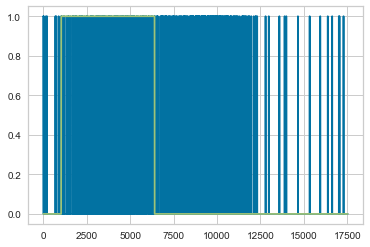

In [21]:
plt.plot(tot.index, tot["Anomaly"] )
plt.plot(y.index, y["Label"] )

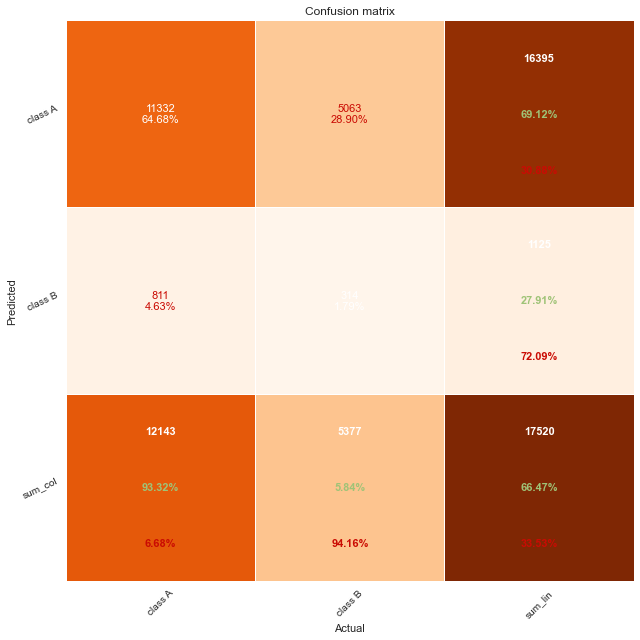

In [153]:
pp_matrix_from_data (y["Label"],tot["Anomaly"])

In [ ]:
#prochain modèle : isolation forest

In [102]:
iforest = create_model('iforest')
print(iforest)


IForest(behaviour='new', bootstrap=False, contamination=0.05,
    max_features=1.0, max_samples='auto', n_estimators=100, n_jobs=-1,
    random_state=7754, verbose=0)


In [154]:
plot_model(iforest, plot = 'umap')

In [155]:
result = assign_model(iforest)
result

0         1         2         3         4         5         6  \
7691  -2.124081 -1.620562 -2.338984 -2.124081 -2.660231 -3.298053 -2.523063   
4592  -2.124475 -1.620561 -2.338984 -2.124475 -2.660231 -3.256953 -2.523080   
11794 -2.123686 -1.620561 -2.338982 -2.123686 -2.659761 -3.256953 -2.522930   
15563 -2.123949 -1.620562 -2.338983 -2.123949 -2.660152 -3.298053 -2.523047   
10417 -2.124081 -1.620562 -2.338983 -2.124081 -2.660074 -3.277503 -2.523047   
...         ...       ...       ...       ...       ...       ...       ...   
6400  -2.124344 -1.620561 -2.338984 -2.124344 -2.660231 -3.256953 -2.523080   
15288 -2.123555 -1.620561 -2.338982 -2.123555 -2.659761 -3.277503 -2.522930   
11513 -2.123292 -1.620561 -2.338981 -2.123292 -2.659526 -3.256953 -2.522863   
1688  -2.124606 -1.620561 -2.338985 -2.124606 -2.660466 -3.298053 -2.523163   
5994  -2.124475 -1.620561 -2.338984 -2.124475 -2.660309 -3.277503 -2.523097   

              7         8         9  ...        13        14        15  \
7691  -2.483471 -2.599762 -2.357780  ... -1.563106 -1.615645 -1.640493   
4592  -2.483480 -2.600649 -2.357973  ... -1.563124 -1.615662 -1.640511   
11794 -2.483379 -2.597100 -2.357008  ... -1.563108 -1.615647 -1.640495   
15563 -2.483452 -2.599762 -2.357587  ... -1.563107 -1.615645 -1.640493   
10417 -2.483452 -2.599762 -2.357394  ... -1.563107 -1.615645 -1.640493   
...         ...       ...       ...  ...       ...       ...       ...   
6400  -2.483471 -2.600649 -2.357973  ... -1.563124 -1.615662 -1.640511   
15288 -2.483379 -2.597100 -2.357008  ... -1.563108 -1.615646 -1.640495   
11513 -2.483334 -2.596213 -2.356429  ... -1.563109 -1.615648 -1.640497   
1688  -2.483525 -2.601536 -2.358359  ... -1.563124 -1.615662 -1.640511   
5994  -2.483489 -2.600649 -2.357973  ... -1.563124 -1.615662 -1.640511   

             16        17        18        19        20  Anomaly  \
7691  -1.607113 -1.637722 -1.667955 -1.601312 -1.538400        0   
4592  -1.607131 -1.637740 -1.667973 -1.601331 -1.538419        0   
11794 -1.607115 -1.637724 -1.667957 -1.601314 -1.538402        0   
15563 -1.607113 -1.637722 -1.667955 -1.601312 -1.538400        0   
10417 -1.607113 -1.637722 -1.667955 -1.601312 -1.538400        0   
...         ...       ...       ...       ...       ...      ...   
6400  -1.607131 -1.637740 -1.667973 -1.601331 -1.538419        0   
15288 -1.607115 -1.637724 -1.667957 -1.601314 -1.538402        0   
11513 -1.607116 -1.637726 -1.667959 -1.601316 -1.538404        0   
1688  -1.607131 -1.637740 -1.667973 -1.601330 -1.538418        0   
5994  -1.607131 -1.637740 -1.667973 -1.601331 -1.538419        0   

       Anomaly_Score  
7691       -0.084983  
4592       -0.160871  
11794      -0.158248  
15563      -0.083230  
10417      -0.076484  
...              ...  
6400       -0.076557  
15288      -0.151241  
11513      -0.132599  
1688       -0.038174  
5994       -0.087903  

[14016 rows x 23 columns]

In [174]:
predictions = predict_model(iforest, data = X_test)
predictions

ValueError: Number of features of the model must match the input. Model n_features is 21 and input n_features is 22.

In [105]:
tot  = pd.concat ( [result, predictions])
tot.sort_index(inplace=True)
tot.describe()

Node 11        Link 9       Link 10       Link 11       Link 12  \
count  17520.000000  17520.000000  17520.000000  17520.000000  17520.000000   
mean      25.210068    398.955411    200.786096     25.210068     36.300411   
std       12.864225    247.190489     86.845689     12.864225     14.642897   
min        3.600000     93.600000   -986.400000      3.600000      3.600000   
25%       10.800000    223.200000    126.000000     10.800000     25.200000   
50%       25.200000    288.000000    198.000000     25.200000     36.000000   
75%       36.000000    759.600000    270.000000     36.000000     46.800000   
max       61.200000    759.600000    446.400000     61.200000    118.800000   

            Link 22      Link 111      Link 112      Link 113      Link 121  \
count  17520.000000  17520.000000  17520.000000  17520.000000  17520.000000   
mean       8.805000     51.857466     59.776438     18.178767     25.210068   
std        3.638183     21.552400     25.069313      7.981448     11.687677   
min      -50.400000   -133.200000    -14.400000     -3.600000      7.200000   
25%        7.200000     32.400000     39.600000     10.800000     14.400000   
50%       10.800000     50.400000     57.600000     18.000000     25.200000   
75%       10.800000     68.400000     79.200000     25.200000     36.000000   
max       21.600000    108.000000    248.400000     90.000000     57.600000   

       ...   Pressure 11   Pressure 12   Pressure 13   Pressure 21  \
count  ...  17520.000000  17520.000000  17520.000000  17520.000000   
mean   ...     78.788028     80.916195     81.835479     79.949577   
std    ...     51.405668     51.083796     50.885555     50.748192   
min    ...      1.430000      3.909000      5.003000      3.356000   
25%    ...      2.898750      5.772750      7.176000      5.599750   
50%    ...    107.595000    109.088500    109.606000    107.456500   
75%    ...    115.901250    117.968000    118.853750    116.949250   
max    ...    126.699000    129.553000    130.956000    129.358000   

        Pressure 22   Pressure 23   Pressure 31   Pressure 32       Anomaly  \
count  17520.000000  17520.000000  17520.000000  17520.000000  17520.000000   
mean      81.480595     82.986019     79.058161     75.727684      0.050171   
std       50.753253     50.754017     50.371701     50.225787      0.218304   
min        4.859000      6.343000      3.138000      0.127000      0.000000   
25%        7.123750      8.641750      5.473750      2.418750      0.000000   
50%      109.000500    110.499000    105.877500    102.277500      0.000000   
75%      118.480250    119.990750    115.927250    112.541000      0.000000   
max      130.888000    132.410000    129.155000    126.067000      1.000000   

       Anomaly_Score  
count   17520.000000  
mean       -0.101973  
std         0.051522  
min        -0.177168  
25%        -0.144408  
50%        -0.108721  
75%        -0.077796  
max         0.100175  

[8 rows x 23 columns]

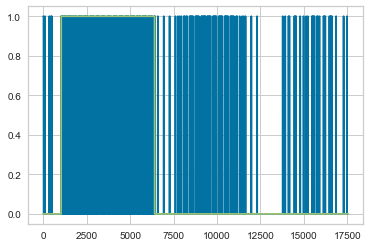

In [110]:
plt.plot(tot.index, tot["Anomaly"] )
plt.plot(y.index, y["Label"] )

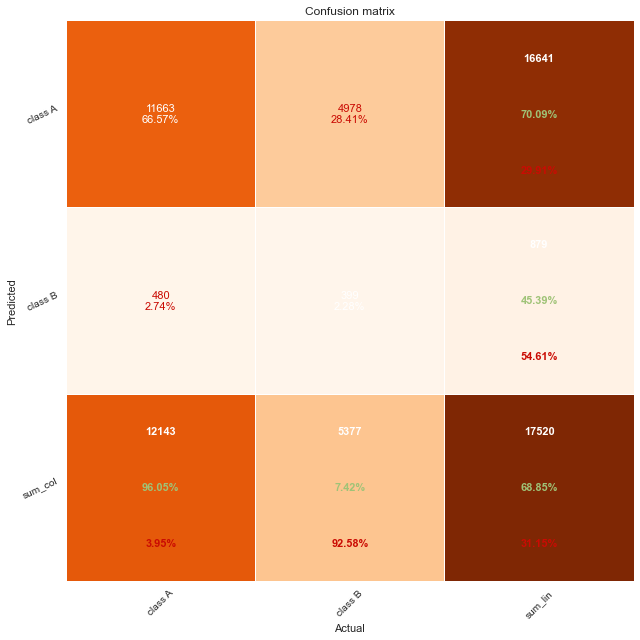

In [115]:
pp_matrix_from_data (y["Label"],tot["Anomaly"])

In [180]:
pca = create_model('pca')
print(pca)


PCA(contamination=0.05, copy=True, iterated_power='auto', n_components=None,
  n_selected_components=None, random_state=3567, standardization=True,
  svd_solver='auto', tol=0.0, weighted=True, whiten=False)


In [182]:
result = assign_model(pca)
result

Unnamed: 0  Node 11  Link 9  Link 10  Link 11  Link 12  Link 22  \
7691         7691     21.6   147.6    147.6     21.6     25.2      3.6   
4592         4592     10.8   759.6    129.6     10.8     25.2     10.8   
11794       11794     32.4   262.8    262.8     32.4     46.8     10.8   
15563       15563     25.2   169.2    169.2     25.2     28.8      3.6   
10417       10417     21.6   169.2    169.2     21.6     32.4      7.2   
...           ...      ...     ...      ...      ...      ...      ...   
6400         6400     14.4   759.6    136.8     14.4     25.2     10.8   
15288       15288     36.0   259.2    259.2     36.0     46.8      7.2   
11513       11513     43.2   320.4    320.4     43.2     57.6     10.8   
1688         1688      7.2   756.0     68.4      7.2     14.4      3.6   
5994         5994     10.8   759.6    118.8     10.8     21.6      7.2   

       Link 111  Link 112  Link 113  ...  Pressure 11  Pressure 12  \
7691       39.6      43.2      14.4  ...      123.155      125.749   
4592       36.0      39.6      10.8  ...        2.007        4.659   
11794      68.4      79.2      25.2  ...      111.019      112.738   
15563      43.2      50.4      14.4  ...      121.534      124.014   
10417      43.2      50.4      14.4  ...      121.290      123.740   
...         ...       ...       ...  ...          ...          ...   
6400       36.0      43.2      10.8  ...        1.898        4.521   
15288      68.4      79.2      25.2  ...      111.260      113.022   
11513      82.8      97.2      28.8  ...      101.995      103.124   
1688       18.0      21.6       7.2  ...        3.178        6.113   
5994       32.4      36.0      10.8  ...        2.269        4.991   

       Pressure 13  Pressure 21  Pressure 22  Pressure 23  Pressure 31  \
7691       126.978      125.263      126.798      128.316      124.782   
4592         5.919        4.257        5.779        7.286        4.013   
11794      113.382      111.290      112.824      114.325      109.964   
15563      125.177      123.430      124.961      126.479      122.828   
10417      124.861      123.116      124.647      126.160      122.439   
...            ...          ...          ...          ...          ...   
6400         5.740        4.094        5.612        7.111        3.874   
15288      113.717      111.640      113.172      114.682      110.313   
11513      103.351      101.106      102.633      104.125       99.114   
1688         7.561        5.996        7.521        9.042        5.900   
5994         6.285        4.655        6.178        7.687        4.440   

       Pressure 32  Anomaly  Anomaly_Score  
7691       121.675        0   4.001930e+16  
4592         0.963        0   6.161359e+16  
11794      106.550        0   3.453542e+16  
15563      119.595        0   3.941594e+16  
10417      119.274        0   3.349321e+16  
...            ...      ...            ...  
6400         0.817        0   5.992165e+16  
15288      106.747        0   3.766026e+16  
11513       95.420        0   4.997932e+16  
1688         2.847        1   7.363998e+16  
5994         1.388        0   6.208898e+16  

[14016 rows x 24 columns]

In [184]:
predictions = predict_model(pca, data = X_test)
predictions

Unnamed: 0  Node 11  Link 9  Link 10  Link 11  Link 12  Link 22  \
14658       14658     43.2   320.4    320.4     43.2     54.0     14.4   
16322       16322     18.0   126.0    126.0     18.0     21.6      3.6   
14447       14447     21.6   169.2    169.2     21.6     28.8      7.2   
7817         7817     39.6   320.4    320.4     39.6     57.6     14.4   
9004         9004     46.8   331.2    331.2     46.8     61.2     10.8   
...           ...      ...     ...      ...      ...      ...      ...   
2961         2961     10.8   759.6    129.6     10.8     25.2     10.8   
16801       16801     18.0   129.6    129.6     18.0     21.6      3.6   
4550         4550     10.8   759.6    136.8     10.8     28.8     10.8   
7955         7955     39.6   306.0    306.0     39.6     54.0     10.8   
3211         3211     14.4   759.6    133.2     14.4     25.2      7.2   

       Link 111  Link 112  Link 113  ...  Pressure 11  Pressure 12  \
14658      82.8      93.6      28.8  ...      102.541      103.709   
16322      32.4      36.0      10.8  ...      124.808      127.519   
14447      43.2      50.4      14.4  ...      121.415      123.873   
7817       82.8      97.2      28.8  ...      102.508      103.611   
9004       86.4     100.8      28.8  ...      100.289      101.332   
...         ...       ...       ...  ...          ...          ...   
2961       36.0      39.6      14.4  ...        2.022        4.669   
16801      32.4      36.0      10.8  ...      124.517      127.215   
4550       36.0      43.2      10.8  ...        1.903        4.520   
7955       79.2      93.6      28.8  ...      104.478      105.766   
3211       36.0      39.6      10.8  ...        1.993        4.643   

       Pressure 13  Pressure 21  Pressure 22  Pressure 23  Pressure 31  \
14658      104.044      101.743      103.271      104.755       99.884   
16322      128.823      127.155      128.693      130.214      126.724   
14447      125.007      123.267      124.798      126.315      122.677   
7817       103.847      101.578      103.109      104.593       99.811   
9004       101.502       99.166      100.693      102.195       97.081   
...            ...          ...          ...          ...          ...   
2961         5.937        4.263        5.785        7.291        4.021   
16801      128.510      126.865      128.394      129.913      126.523   
4550         5.732        4.099        5.613        7.104        3.883   
7955       106.155      103.839      105.386      106.886      101.909   
3211         5.899        4.237        5.760        7.267        4.008   

       Pressure 32  Anomaly  Anomaly_Score  
14658       96.245        0   5.149378e+16  
16322      123.598        0   4.823154e+16  
14447      119.515        0   3.590848e+16  
7817        96.079        0   4.962573e+16  
9004        93.398        0   5.350049e+16  
...            ...      ...            ...  
2961         0.966        0   6.161178e+16  
16801      123.402        0   4.834921e+16  
4550         0.830        0   6.109114e+16  
7955        98.323        0   4.627740e+16  
3211         0.954        0   6.094184e+16  

[3504 rows x 24 columns]

In [185]:
tot  = pd.concat ( [result, predictions])
tot.sort_index(inplace=True)
tot.describe()

Unnamed: 0       Node 11        Link 9       Link 10       Link 11  \
count  17520.000000  17520.000000  17520.000000  17520.000000  17520.000000   
mean    8759.500000     25.210068    398.955411    200.786096     25.210068   
std     5057.732694     12.864225    247.190489     86.845689     12.864225   
min        0.000000      3.600000     93.600000   -986.400000      3.600000   
25%     4379.750000     10.800000    223.200000    126.000000     10.800000   
50%     8759.500000     25.200000    288.000000    198.000000     25.200000   
75%    13139.250000     36.000000    759.600000    270.000000     36.000000   
max    17519.000000     61.200000    759.600000    446.400000     61.200000   

            Link 12       Link 22      Link 111      Link 112      Link 113  \
count  17520.000000  17520.000000  17520.000000  17520.000000  17520.000000   
mean      36.300411      8.805000     51.857466     59.776438     18.178767   
std       14.642897      3.638183     21.552400     25.069313      7.981448   
min        3.600000    -50.400000   -133.200000    -14.400000     -3.600000   
25%       25.200000      7.200000     32.400000     39.600000     10.800000   
50%       36.000000     10.800000     50.400000     57.600000     18.000000   
75%       46.800000     10.800000     68.400000     79.200000     25.200000   
max      118.800000     21.600000    108.000000    248.400000     90.000000   

       ...   Pressure 11   Pressure 12   Pressure 13   Pressure 21  \
count  ...  17520.000000  17520.000000  17520.000000  17520.000000   
mean   ...     78.788028     80.916195     81.835479     79.949577   
std    ...     51.405668     51.083796     50.885555     50.748192   
min    ...      1.430000      3.909000      5.003000      3.356000   
25%    ...      2.898750      5.772750      7.176000      5.599750   
50%    ...    107.595000    109.088500    109.606000    107.456500   
75%    ...    115.901250    117.968000    118.853750    116.949250   
max    ...    126.699000    129.553000    130.956000    129.358000   

        Pressure 22   Pressure 23   Pressure 31   Pressure 32       Anomaly  \
count  17520.000000  17520.000000  17520.000000  17520.000000  17520.000000   
mean      81.480595     82.986019     79.058161     75.727684      0.050228   
std       50.753253     50.754017     50.371701     50.225787      0.218422   
min        4.859000      6.343000      3.138000      0.127000      0.000000   
25%        7.123750      8.641750      5.473750      2.418750      0.000000   
50%      109.000500    110.499000    105.877500    102.277500      0.000000   
75%      118.480250    119.990750    115.927250    112.541000      0.000000   
max      130.888000    132.410000    129.155000    126.067000      1.000000   

       Anomaly_Score  
count   1.752000e+04  
mean    4.894618e+16  
std     1.400493e+16  
min     2.895114e+16  
25%     3.636762e+16  
50%     4.623619e+16  
75%     6.186151e+16  
max     2.892762e+17  

[8 rows x 24 columns]

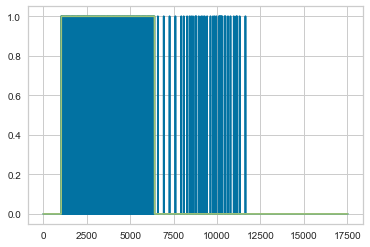

In [186]:
plt.plot(tot.index, tot["Anomaly"] )
plt.plot(y.index, y["Label"] )

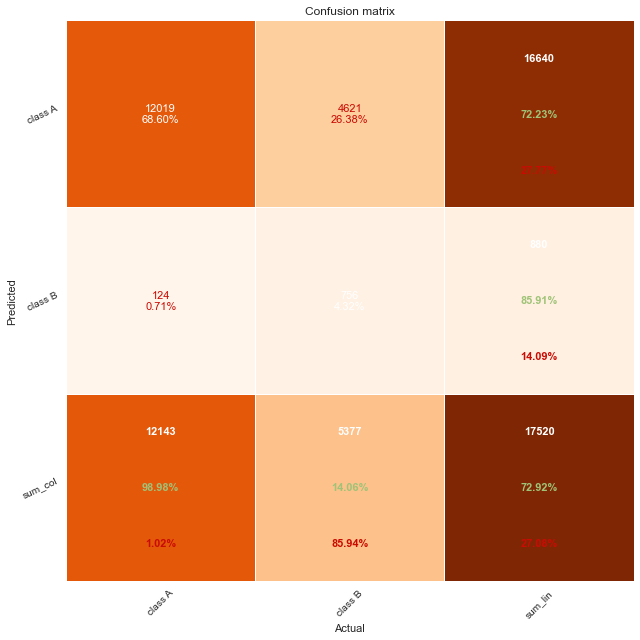

In [187]:
pp_matrix_from_data (y["Label"],tot["Anomaly"])